In [406]:
import math
import json
from pprint import pprint
with open('QTable_Alpha_0_01_Gamma_1_Decay_0_99.json') as f:
    Qtable = json.load(f)
print("Length of QTable: " + str(len(Qtable)))

Length of QTable: 197


In [404]:
xs = []; zs = []; yaws = []
for key in Qtable:
    values = key.split(":")
    x = int(values[0])
    z = int(values[1])
    yaw = int(values[2])
    if x not in xs: xs.append(x)
    if z not in zs: zs.append(z)
    if yaw not in yaws: yaws.append(yaw)
    
print(xs); print(zs); print(yaws)

[0, 1, 2, 3, 4, 5, 6]
[0, 3, 4, 6, 5, 1, 2]
[0, 270, 180, 90]


[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6')]

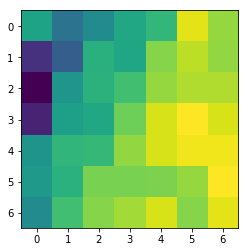

In [412]:
xLen = max(xs); zLen = max(zs);  
grid = np.ones(((xLen+1)*36,(zLen+1)*36))
block = np.ones((int(36),int(36)))

for key in Qtable:
    values = key.split(":")
    x = float(values[0])
    z = float(values[1])
    reward = max(Qtable[key])
    
    gridXStart = int(x*36)
    gridXEnd = int(x*36 + 36)
    gridZStart = int(z*36)
    gridZEnd = int(z*36 + 36)

    grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)
    
ax = plt.axes()
ax.imshow(grid)

ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)])
ax.set_xticklabels([str(i) for i in range(xLen+1)])
ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)])
ax.set_yticklabels([str(i) for i in range(xLen+1)])


In [418]:
from matplotlib import pyplot as plt
from numpy import genfromtxt
import numpy as np
file = 'Results_Alpha_0_01_Gamma_1_Decay_0_99.csv'
my_data = genfromtxt(file, delimiter=',')
y = [x[0] for x in my_data]
time = [x[2] for x in my_data]
epsilon = [x[-1] for x in my_data]

print("Games: " , str(len(y)), " - Average Time: ", str(sum(time)/len(y)))


Games:  35  - Average Time:  231.4


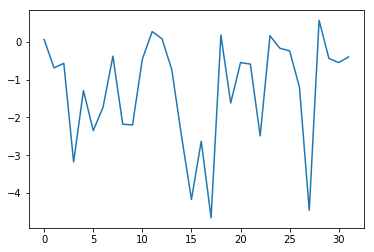

In [415]:
plt.plot(y) # Plot shown when learning with epsilon decay at 0.99

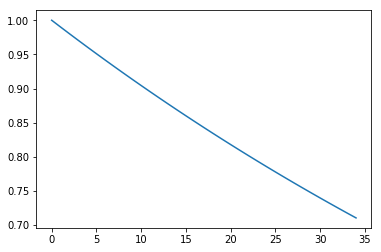

In [419]:
plt.plot(epsilon)

-3.4881818094916923


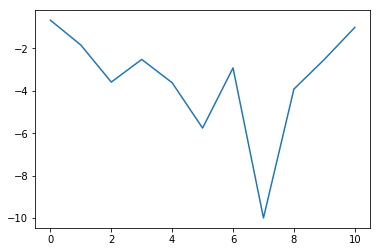

In [5]:
plt.plot(y) # Run when epsilon set to 0 and loaded from q table built from previous 2 runs
print(np.mean(y))